# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

In [3]:
#subir el archivo perros_y_gatos.zip
# está acá: https://drive.google.com/file/d/1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm/view?usp=sharing\
!gdown --id 1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm

Downloading...
From: https://drive.google.com/uc?id=1WgbH_Xt421hNhD4gcfwsvtVsFheJKefm
To: /content/perros_y_gatos.zip
90.8MB [00:01, 84.9MB/s]


In [4]:
!unzip /content/perros_y_gatos.zip > /dev/null

In [5]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [6]:
cd /content

/content


In [7]:
train_dir = './train'
validation_dir = './validation'
test_dir = './test'

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [9]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob("./*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [11]:
!ls

perros_y_gatos.zip  sample_data  test  train  validation


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [16]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
100/100 [==============================] - 41s 86ms/step - loss: 0.6935 - acc: 0.5265 - val_loss: 0.6735 - val_acc: 0.5760
Epoch 2/5
100/100 [==============================] - 9s 85ms/step - loss: 0.6621 - acc: 0.5920 - val_loss: 0.6444 - val_acc: 0.6230
Epoch 3/5
100/100 [==============================] - 9s 86ms/step - loss: 0.6143 - acc: 0.6550 - val_loss: 0.6156 - val_acc: 0.6510
Epoch 4/5
100/100 [==============================] - 8s 85ms/step - loss: 0.5817 - acc: 0.6870 - val_loss: 0.6198 - val_acc: 0.6450
Epoch 5/5
100/100 [==============================] - 8s 84ms/step - loss: 0.5522 - acc: 0.7175 - val_loss: 0.6077 - val_acc: 0.6580


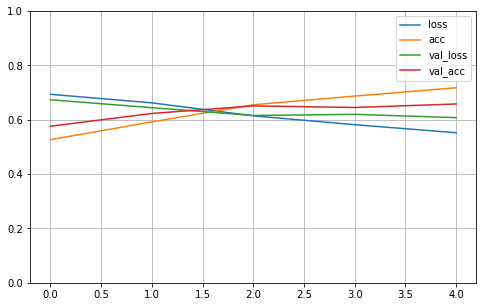

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en y expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=5,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

In [29]:
# i = 1
# for batch in train_datagen.flow(train_generator, batch_size=1,
#                           save_to_dir='.', save_prefix='img', save_format='jpeg'):
#     i += 1
#     if i > 6:
#         break

# import matplotlib.image as mpimg
# import glob
# import os

# files =glob.glob(".\*.jpeg")
# plt.figure(figsize=(10,5))
# i = 1
# for f in files:
#     if i > 6:
#         break 
#     plt.subplot(2,3,i)
#     image = mpimg.imread(f)
#     plt.imshow(image)
#     i+=1
#     os.remove(f)
    
# plt.show()

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [32]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
100/100 [==============================] - 17s 169ms/step - loss: 0.4844 - acc: 0.7655 - val_loss: 0.4974 - val_acc: 0.7550
Epoch 2/50
100/100 [==============================] - 17s 169ms/step - loss: 0.4698 - acc: 0.7795 - val_loss: 0.5378 - val_acc: 0.7310
Epoch 3/50
100/100 [==============================] - 17s 169ms/step - loss: 0.4481 - acc: 0.7940 - val_loss: 0.4845 - val_acc: 0.7600
Epoch 4/50
100/100 [==============================] - 17s 169ms/step - loss: 0.4479 - acc: 0.7950 - val_loss: 0.4844 - val_acc: 0.7770
Epoch 5/50
100/100 [==============================] - 16s 165ms/step - loss: 0.4550 - acc: 0.7810 - val_loss: 0.4863 - val_acc: 0.7560
Epoch 6/50
100/100 [==============================] - 16s 164ms/step - loss: 0.4474 - acc: 0.7910 - val_loss: 0.5091 - val_acc: 0.7550
Epoch 7/50
100/100 [==============================] - 17s 166ms/step - loss: 0.4287 - acc: 0.8030 - val_loss: 0.4962 - val_acc: 0.7680
Epoch 8/50
100/100 [==============================] - 1

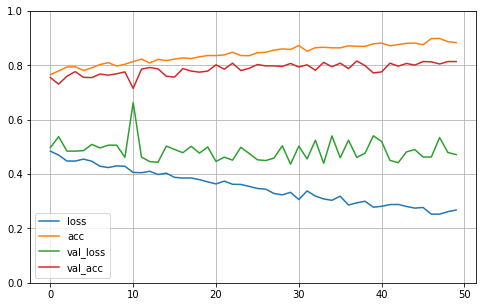

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
# Guardo el modelo
model.save('model_cats_dogs.h5')

In [35]:
# Chequeamos el accuracy sobre test
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [36]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.4589828848838806, 0.8080000281333923]

Observamos un accuracy de:
- 88% en train
- 81% en validation
- 80% en test

Ahora utilizaremos el modelo para etiquetar imagenes propias de Arena y Popy

In [56]:
classes_dict={0:"cat",1:"dog"}

In [42]:
arena_generator = test_datagen.flow_from_directory(
        './Arena',
        target_size=(150, 150),
        class_mode='binary')

Found 3 images belonging to 2 classes.


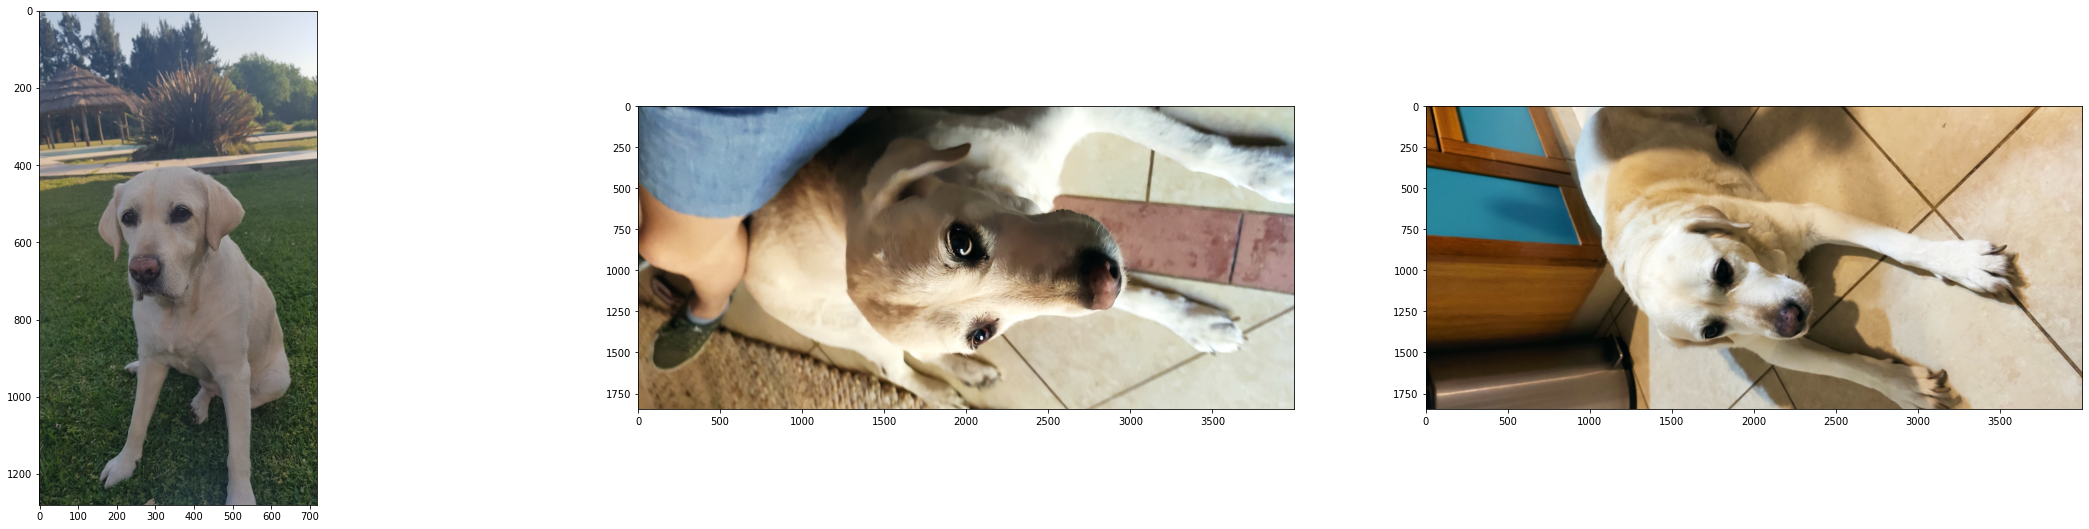

In [74]:
import matplotlib.image as mpimg
import glob
import os

files =glob.glob("./Arena/img/*.jpg")
plt.figure(figsize=(40,20))
i=1
for f in files:
  plt.subplot(2,3,i)
  image = mpimg.imread(f)
  plt.imshow(image)
  i+=1
    
plt.show()

In [64]:
predictions=(model.predict(arena_generator) >= 0.5)*1
[classes_dict[i[0]] for i in predictions]

['dog', 'dog', 'dog']

En el caso de Arena, el modelo catalogó bien las 3 fotos

In [98]:
popy_generator = test_datagen.flow_from_directory(
        './Popy',
        target_size=(150, 150),
        batch_size=4,
        shuffle=False,
        class_mode='binary')

Found 4 images belonging to 2 classes.


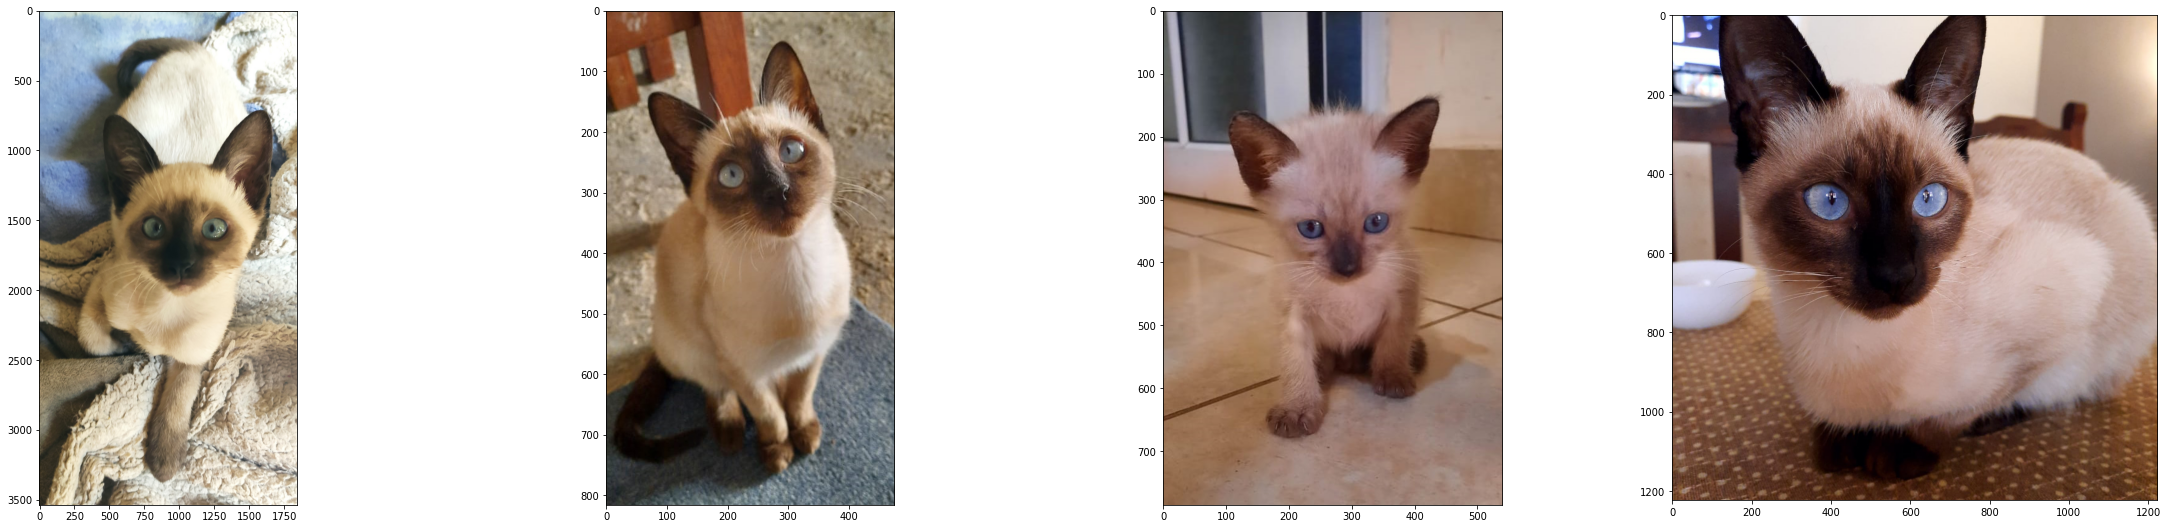

In [99]:
files =glob.glob("./Popy/img/*.jpg")
plt.figure(figsize=(40,20))
i=1
for f in files:
  plt.subplot(2,4,i)
  image = mpimg.imread(f)
  plt.imshow(image)
  i+=1
    
plt.show()

In [100]:
predictions=(model.predict(popy_generator) >= 0.5)*1
[classes_dict[i[0]] for i in predictions]

['cat', 'dog', 'dog', 'cat']

En el caso de Popy, el modelo catalogó mal algunas fotos